In [1]:
import sys
import numpy as np
import open3d as o3d
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import IPython
from PIL import Image
# sys.path.insert(1, "../dataset")
sys.path.insert(1, "../Assignment_2.1")
from A21 import computePoseCameraFrame

In [3]:
poses = computePoseCameraFrame(0)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(poses[:,:3])
# print (np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])
pcd1 = np.round(np.asarray(pcd.points))
print (pcd1)

../dataset/01/000000.bin
Hello 2.1!
[[ -6.  -2.  52.]
 [-13.  -3.  79.]
 [-13.  -3.  79.]
 ...
 [  1.   2.   4.]
 [  1.   2.   4.]
 [  1.   2.   4.]]


In [4]:
pcd_df = pd.DataFrame(data=pcd1,columns=['x','y','z'])
pcd_df.drop_duplicates(subset = ["y","x","z"],inplace=True)
pts = pcd_df.groupby(['x','z']).count().index
counts = pcd_df.groupby(['x','z']).count()
print (counts)

             y
x     z       
-74.0  30.0  1
-72.0 -36.0  1
      -34.0  5
      -33.0  1
-71.0 -38.0  1
...         ..
 73.0  23.0  2
       24.0  1
 74.0  17.0  1
       23.0  2
 75.0  23.0  1

[5894 rows x 1 columns]


In [5]:
pts.values

array([(-74.0, 30.0), (-72.0, -36.0), (-72.0, -34.0), ..., (74.0, 17.0),
       (74.0, 23.0), (75.0, 23.0)], dtype=object)

In [6]:
pcd_new = pd.DataFrame({'pts':pts.values,'count':counts['y']})
pcd_new.reset_index(drop=True,inplace=True)
pcd_new

pts  count
0      (-74.0, 30.0)      1
1     (-72.0, -36.0)      1
2     (-72.0, -34.0)      5
3     (-72.0, -33.0)      1
4     (-71.0, -38.0)      1
...              ...    ...
5889    (73.0, 23.0)      2
5890    (73.0, 24.0)      1
5891    (74.0, 17.0)      1
5892    (74.0, 23.0)      2
5893    (75.0, 23.0)      1

[5894 rows x 2 columns]

In [7]:
pcd_new[['count']].describe()

count
count  5894.000000
mean      1.436206
std       0.939500
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       7.000000

In [8]:
pts_array = pcd_new['pts'].values
pts_array[0]

(-74.0, 30.0)

In [9]:
img = np.zeros((200,200,1), np.uint8)
for i in range(len(pts_array)):
    ind = (pts_array[i][0] + 100,pts_array[i][1]+ 100)
    county = pcd_new.iloc[i,1]
    if (county>1):
#         print ("I am probably an obstacle!")
        img[int(ind[0])][int(ind[1])] = 1

In [10]:
# _,ret = cv.imencode('.jpg', img*255) 
# i = IPython.display.Image(data=ret)
# IPython.display.display(i)

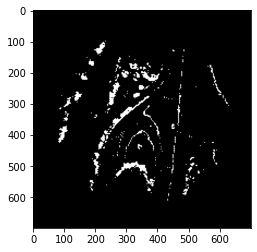

In [11]:
img = cv.resize(img,(700,700))
im = cv.imwrite('grid.png',img*255)
imip = cv.imread('grid.png')
plt.imshow(imip)

In [8]:
def computeGrid(i):
    poses = computePoseCameraFrame(i)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(poses[:,:3])
    pcd1 = np.round(np.asarray(pcd.points))
    pcd_df = pd.DataFrame(data=pcd1,columns=['x','y','z'])
    pcd_df.drop_duplicates(subset = ["y","x","z"],inplace=True)
    pts = pcd_df.groupby(['x','z']).count().index
    counts = pcd_df.groupby(['x','z']).count()
    pcd_new = pd.DataFrame({'pts':pts.values,'count':counts['y']})
    pcd_new.reset_index(drop=True,inplace=True)
    pts_array = pcd_new['pts'].values
    img = np.zeros((400,400,1), np.uint8)
    for j in range(len(pts_array)):
        ind = (pts_array[j][0] + 200,pts_array[j][1]+ 200)
        county = pcd_new.iloc[j,1]
        if (county>1):
    #         print ("I am probably an obstacle!")
            img[int(ind[0])][int(ind[1])] = 1
    return img

In [14]:
def computeGrid_individual_pcd(pcd):
    pcd1 = np.round(np.asarray(pcd.points))
    pcd_df = pd.DataFrame(data=pcd1,columns=['x','y','z'])
    pcd_df.drop_duplicates(subset = ["y","x","z"],inplace=True)
    pts = pcd_df.groupby(['x','z']).count().index
    counts = pcd_df.groupby(['x','z']).count()
    pcd_new = pd.DataFrame({'pts':pts.values,'count':counts['y']})
    pcd_new.reset_index(drop=True,inplace=True)
    pts_array = pcd_new['pts'].values
    img = np.zeros((400,400,1), np.uint8)
    for j in range(len(pts_array)):
        ind = (pts_array[j][0] + 200,pts_array[j][1]+ 200)
        county = pcd_new.iloc[j,1]
        if (county>3):
    #         print ("I am probably an obstacle!")
            img[int(ind[0])][int(ind[1])] = 1
    return img

In [9]:
for i in range(77):
    img = computeGrid(i)
    img = cv.resize(img,(700,700))
    filename = '../dataset/imgs/cv/grid'+str(i)+'.png'
    im = cv.imwrite(filename,img*255)

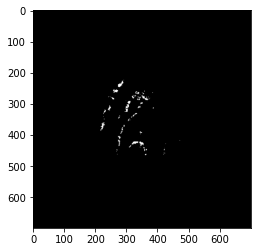

In [15]:
pcd_net = o3d.geometry.PointCloud()
for i in range(5):
    poses = computePoseCameraFrame(i)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(poses[:,:3])
    pcd_net += pcd
downpcd = pcd_net.voxel_down_sample(voxel_size=1)
o3d.visualization.draw_geometries([downpcd])
img_5 = computeGrid_individual_pcd(pcd_net)
img_5 = cv.resize(img_5,(700,700))
filename = '../dataset/imgs/cv/grid_for_5.png'
im = cv.imwrite(filename,img_5*255)
imip = cv.imread('../dataset/imgs/cv/grid_for_5.png')
plt.imshow(imip)

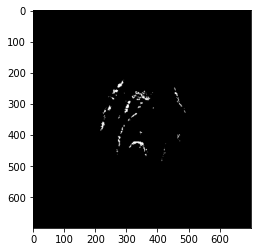

In [16]:
pcd_net = o3d.geometry.PointCloud()
for i in range(10):
    poses = computePoseCameraFrame(i)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(poses[:,:3])
    pcd_net += pcd
downpcd = pcd_net.voxel_down_sample(voxel_size=1)
o3d.visualization.draw_geometries([downpcd])
img_5 = computeGrid_individual_pcd(pcd_net)
img_5 = cv.resize(img_5,(700,700))
filename = '../dataset/imgs/cv/grid_for_10.png'
im = cv.imwrite(filename,img_5*255)
imip = cv.imread('../dataset/imgs/cv/grid_for_10.png')
plt.imshow(imip)

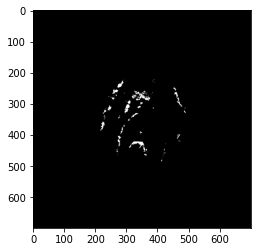

In [17]:
pcd_net = o3d.geometry.PointCloud()
for i in range(15):
    poses = computePoseCameraFrame(i)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(poses[:,:3])
    pcd_net += pcd
downpcd = pcd_net.voxel_down_sample(voxel_size=1)
o3d.visualization.draw_geometries([downpcd])
img_5 = computeGrid_individual_pcd(pcd_net)
img_5 = cv.resize(img_5,(700,700))
filename = '../dataset/imgs/cv/grid_for_15.png'
im = cv.imwrite(filename,img_5*255)
imip = cv.imread('../dataset/imgs/cv/grid_for_15.png')
plt.imshow(imip)